In [201]:
import re
import string
import numpy as np
import pandas as pd
from nltk.stem.snowball import SnowballStemmer 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [202]:
from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [203]:
df = pd.read_csv('C:\\Users\\home\\Desktop\\fake_job_postings.csv')

In [204]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [205]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [206]:
df_fake = df[df['fraudulent'] == 1]
df_real = df[df['fraudulent'] == 0]

In [207]:
df_fake.has_questions.value_counts()

0    616
1    250
Name: has_questions, dtype: int64

In [208]:
df_fake.salary_range.value_counts()

7200-1380000     10
30000-50000       8
250000-500000     7
28000-32000       6
35000-40000       6
                 ..
20-3075           1
30000-100000      1
23000-26000       1
4500-5000         1
36000-50000       1
Name: salary_range, Length: 117, dtype: int64

In [209]:
df_real.has_questions.value_counts()

1    8542
0    8472
Name: has_questions, dtype: int64

In [210]:
columns = ['job_id','telecommuting','has_company_logo','required_experience','required_education']
for col in columns:
    del df[col]

In [211]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,has_questions,employment_type,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,Other,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Full-time,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Full-time,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Hospital & Health Care,Health Care Provider,0


In [212]:
df.fillna('',inplace=True)

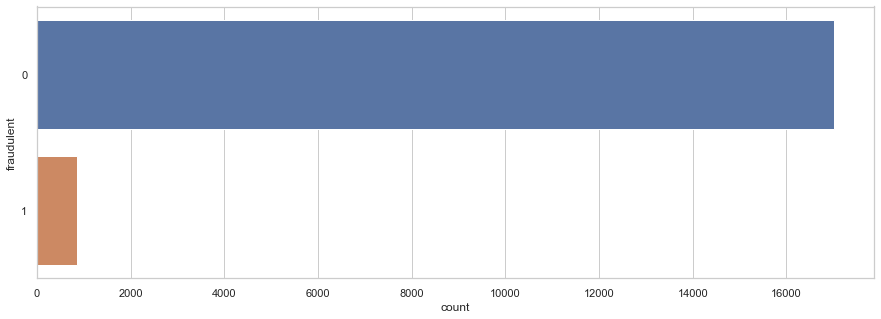

In [213]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data = df)
plt.show()

In [214]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [215]:
def split(location):
    l = location.split(",")
    return l[0]
df['location'] = df.location.apply(split)

In [216]:
df_fake = df[df['fraudulent'] == 1]
df_real = df[df['fraudulent'] == 0]

In [217]:
fake_country = dict(df_fake.location.value_counts()[:10])
real_country = dict(df_real.location.value_counts()[:10])


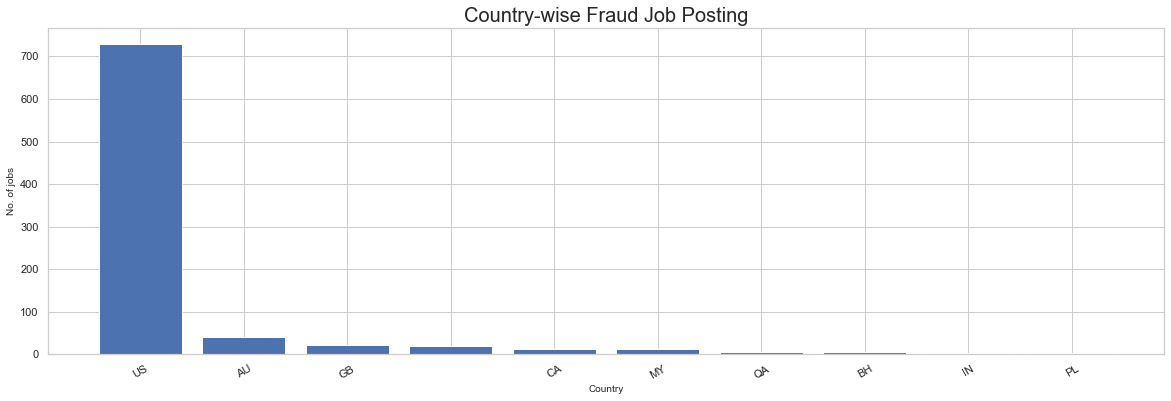

In [218]:
plt.figure(figsize=(20,6))
sns.set_theme(style='whitegrid')
plt.bar(fake_country.keys(),fake_country.values(),label='fake')

plt.title('Country-wise Fraud Job Posting',size=20)
plt.xlabel('Country', size=10)
plt.ylabel('No. of jobs' , size=10)
plt.xticks(rotation=30)

plt.show()

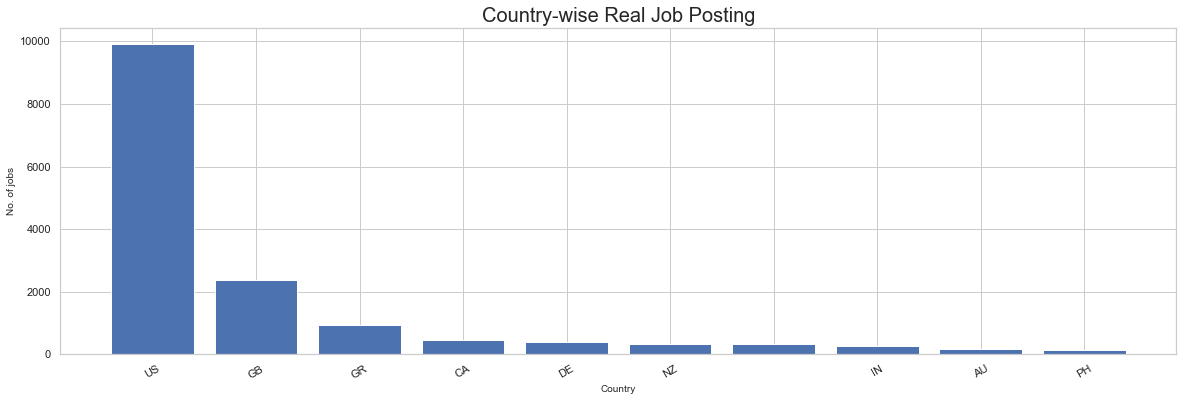

In [219]:
plt.figure(figsize=(20,6))
sns.set_theme(style='whitegrid')
plt.bar(real_country.keys(),real_country.values(),label='real')
plt.title('Country-wise Real Job Posting',size=20)
plt.xlabel('Country' , size=10)
plt.ylabel('No. of jobs' , size=10)
plt.xticks(rotation=30)

plt.show()

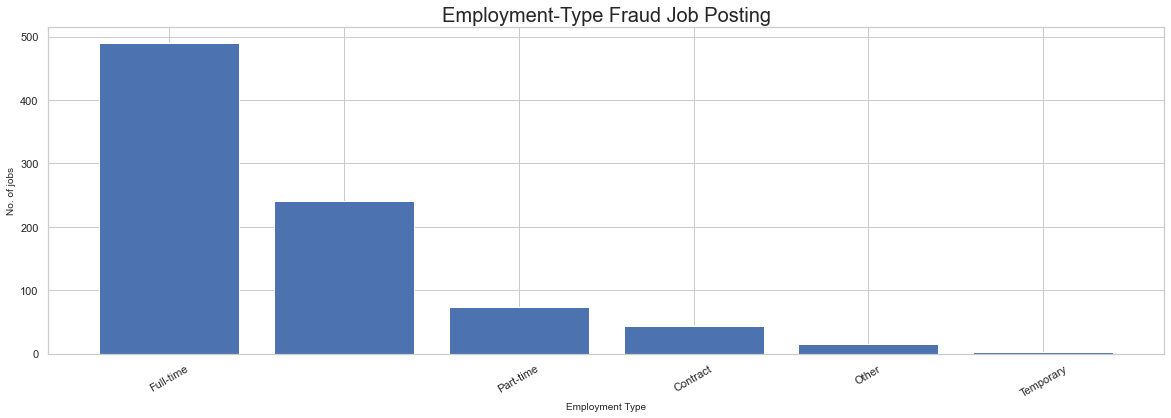

In [220]:
fake_employment_type = dict(df_fake.employment_type.value_counts()[:10])
plt.figure(figsize=(20,6))
sns.set_theme(style='whitegrid')
plt.bar(fake_employment_type.keys(),fake_employment_type.values(),label='fake')
plt.title('Employment-Type Fraud Job Posting',size=20)
plt.xlabel('Employment Type', size=10)
plt.ylabel('No. of jobs' , size=10)
plt.xticks(rotation=30)

plt.show()

In [221]:
print(df[df.fraudulent == 0].title.value_counts())

English Teacher Abroad                                                                                        311
Customer Service Associate                                                                                    146
Graduates: English Teacher Abroad (Conversational)                                                            144
English Teacher Abroad                                                                                         95
Software Engineer                                                                                              86
                                                                                                             ... 
Non-Urgent Patient Transfer Attendant - Greater Toronto Area, New Market, Barrie, Peterborough, Haliburton      1
Mobile QA Tester                                                                                                1
Part-time Pizza Delivery Drivers - Liverpool Allerton (L18)                             

In [222]:
print(df[df.fraudulent == 1].title.value_counts())

Home Based Payroll Typist/Data Entry Clerks Positions Available    21
Cruise Staff Wanted *URGENT*                                       21
Data Entry Admin/Clerical Positions - Work From Home               21
Customer Service Representative                                    17
Administrative Assistant                                           16
                                                                   ..
CASH Paying Vacancies (Apply Today)                                 1
 Accounting Clerk                                                   1
QA Compliance Specialist                                            1
JOB VACANCY IN ST.ERMIN'S HOTEL LONDON                              1
Real Estate & Insurance Professionals                               1
Name: title, Length: 560, dtype: int64


In [223]:
df['text'] = df['title']+ ' ' + df['company_profile'] + ' '+df['salary_range'] + ' '  + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
del df['title']
del df['department']
del df['company_profile']
del df['salary_range']
del df['description']
del df['requirements']
del df['benefits']
del df['industry']
del df['function']

In [224]:
df.head()

,location,has_questions,employment_type,fraudulent,text
0,US,0,Other,0,"Marketing Intern We're Food52, and we've creat..."
1,NZ,0,Full-time,0,Customer Service - Cloud Video Production 90 S...
2,US,0,,0,Commissioning Machinery Assistant (CMA) Valor ...
3,US,0,Full-time,0,Account Executive - Washington DC Our passion ...
4,US,1,Full-time,0,Bill Review Manager SpotSource Solutions LLC i...


In [225]:
df.location.value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
KH        1
SV        1
CM        1
SI        1
GH        1
Name: location, Length: 91, dtype: int64

In [226]:
df.employment_type.value_counts()

Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [227]:
punctuations = string.punctuation
def clean_text(text):
    text = text.strip().lower()
    nopunc =[char for char in text if char not in string.punctuation and not char.isdigit()]
    nopunc=''.join(nopunc)
    list = [word for word in nopunc.split()]
    return " ".join([word for word in list])
df['text'] = df['text'].apply(clean_text)

In [228]:
df.head()

,location,has_questions,employment_type,fraudulent,text
0,US,0,Other,0,marketing intern were food and weve created a ...
1,NZ,0,Full-time,0,customer service cloud video production second...
2,US,0,,0,commissioning machinery assistant cma valor se...
3,US,0,Full-time,0,account executive washington dc our passion fo...
4,US,1,Full-time,0,bill review manager spotsource solutions llc i...


In [229]:
df = df.rename(columns = {'location' : 'loc'})

In [230]:
df.to_csv('fake_jobs.csv')

In [231]:
df = pd.read_csv('fake_jobs.csv',index_col=0)

In [232]:
df.head()

,loc,has_questions,employment_type,fraudulent,text
0,US,0,Other,0,marketing intern were food and weve created a ...
1,NZ,0,Full-time,0,customer service cloud video production second...
2,US,0,NaN,0,commissioning machinery assistant cma valor se...
3,US,0,Full-time,0,account executive washington dc our passion fo...
4,US,1,Full-time,0,bill review manager spotsource solutions llc i...


In [233]:
df.fillna('',inplace=True)

In [234]:
fraudjobs_text = df[df.fraudulent==1].text
realjobs_text = df[df.fraudulent==0].text

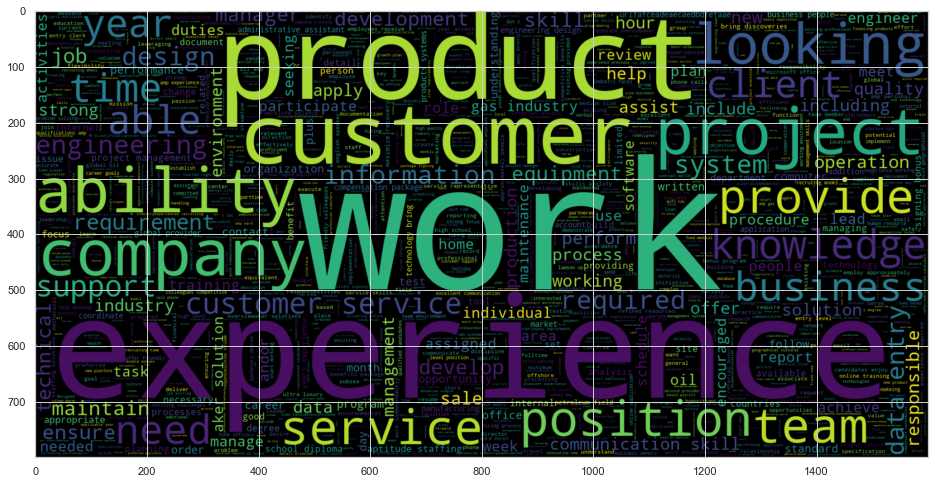

In [235]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc = WordCloud(min_font_size=3,max_words=3000,width = 1600,height = 800,stopwords=STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

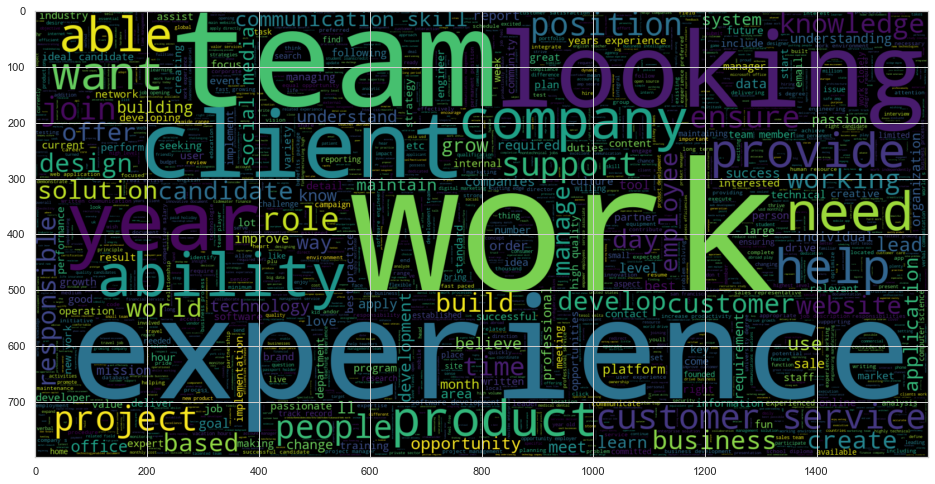

In [238]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc = WordCloud(min_font_size=3,max_words=3000,width = 1600,height = 800,stopwords=STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [240]:
enc = LabelEncoder()
df.loc[:,['employment_type','loc']] = df.loc[:,['employment_type','loc']].apply(enc.fit_transform)

In [241]:
df.head()

,loc,has_questions,employment_type,fraudulent,text
0,86,0,3,0,marketing intern were food and weve created a ...
1,61,0,2,0,customer service cloud video production second...
2,86,0,0,0,commissioning machinery assistant cma valor se...
3,86,0,2,0,account executive washington dc our passion fo...
4,86,1,2,0,bill review manager spotsource solutions llc i...


In [242]:
tf = TfidfVectorizer(max_features=2000)

In [243]:
df1 = pd.DataFrame(tf.fit_transform(df['text']).toarray(),columns=tf.get_feature_names())
df.drop(['text'],axis=1,inplace=True)
main_df = pd.concat([df1,df],axis=1)

In [244]:
main_df.head()

,abilities,ability,able,about,above,abroad,academic,accept,access,accordance,...,your,youre,yourself,zealand,και,να,loc,has_questions,employment_type,fraudulent
0,0.0,0.000000,0.000000,0.026155,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,86,0,3,0
1,0.0,0.000000,0.013815,0.049969,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.058954,0.0,0.023901,0.0,0.0,0.0,61,0,2,0
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.062852,...,0.045004,0.0,0.000000,0.0,0.0,0.0,86,0,0,0
3,0.0,0.017016,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.041205,0.0,0.000000,0.0,0.0,0.0,86,0,2,0
4,0.0,0.000000,0.028857,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.061572,0.0,0.000000,0.0,0.0,0.0,86,1,2,0


In [245]:
features = main_df.drop(['fraudulent'],axis=1)
target = main_df['fraudulent']

In [246]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\home\anaconda3\lib\site-packages (0.8.0)


In [247]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(features,target,random_state=0,test_size=0.3)
print("Before smote - Train : " ,Counter(y_train))

Before smote - Train :  Counter({0: 11877, 1: 639})


In [248]:
rfc = RandomForestClassifier(n_jobs = 3,n_estimators=100,criterion="entropy")
model = rfc.fit(x_train,y_train)

In [249]:
pred = rfc.predict(x_test)
pd.crosstab(y_test,pred)

col_0,0,1
fraudulent,,
0,5133,4
1,114,113


In [253]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(sampling_strategy = 'minority',random_state = 42)
x_train_smote , y_train_smote = sm.fit_resample(x_train,y_train)

In [254]:
print("After smote - Train : " ,Counter(y_train_smote))

After smote - Train :  Counter({1: 11907, 0: 11877})


In [255]:
model = rfc.fit(x_train_smote,y_train_smote)
pred = rfc.predict(x_test)
pd.crosstab(y_test,pred)

col_0,0,1
fraudulent,,
0,5130,7
1,88,139


In [192]:
counts = Counter(y_train_smote)

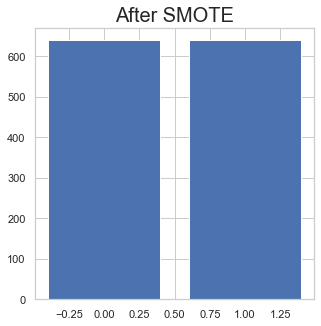

In [193]:
plt.figure(figsize=(5,5))
sns.set_theme(style='whitegrid')
plt.bar(counts.keys(),counts.values())

plt.title('After SMOTE',size=20)
plt.show()

In [194]:
smote_df = x_train_smote
smote_df['fraudulent'] = y_train_smote

In [195]:
smote_df.head()

,abilities,ability,able,about,above,abroad,academic,accept,access,accordance,...,your,youre,yourself,zealand,και,να,loc,has_questions,employment_type,fraudulent
0,0.0,0.014636,0.033222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023628,0.0,0.028738,0.0,0.0,0.0,28,0,2,0
1,0.0,0.000000,0.000000,0.024475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.173253,0.0,0.000000,0.0,0.0,0.0,86,0,2,0
2,0.0,0.000000,0.000000,0.062669,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049292,0.0,0.119900,0.0,0.0,0.0,86,0,2,0
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048709,0.0,0.000000,0.0,0.0,0.0,86,0,2,0
4,0.0,0.031526,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025448,0.0,0.000000,0.0,0.0,0.0,86,1,0,0


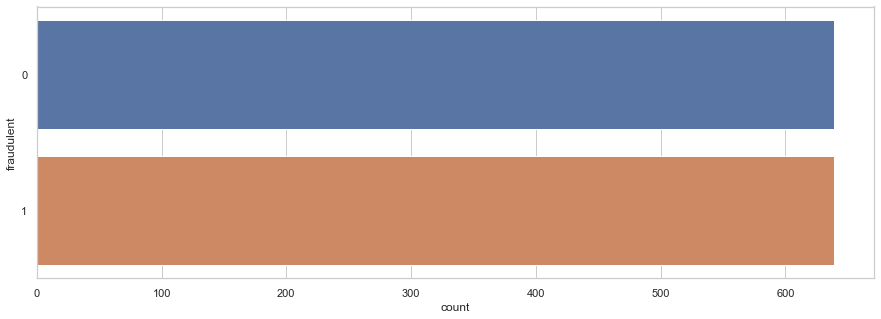

In [196]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data = smote_df)
plt.show()

In [197]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
pred = rfc.predict(x_test)
score = accuracy_score(y_test, pred)
score

0.8978374347501864

In [ ]:
from imblearn import under_sampling
sm = under_sampling.RandomUnderSampler(sampling_strategy = 'auto',random_state = 42)
x_train_smote , y_train_smote = sm.fit_resample(x_train,y_train)